In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
dataset = pd.read_csv(r"D:\BigData And DataMining\Data Mining\DataMining_Project\Mall_Customers.csv")
print(dataset)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [9]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
#Kiểm tra dữ liệu bị NaN(rỗng) nếu có ta sẽ drop hoặc thay thế nó bằng mean, mid arange, median
for i in dataset:
    missing_value = dataset[i].isnull().sum()
    missing_percent = missing_value/len(dataset)*100
    print(f"Cột {i}: có {missing_percent}% giá trị thiếu")
print("Số (hàng, cột): ",dataset.shape)
print('--------------------------------')
print(dataset.dtypes)
print(dataset.describe())


Cột CustomerID: có 0.0% giá trị thiếu
Cột Gender: có 0.0% giá trị thiếu
Cột Age: có 0.0% giá trị thiếu
Cột Annual Income (k$): có 0.0% giá trị thiếu
Cột Spending Score (1-100): có 0.0% giá trị thiếu
Số (hàng, cột):  (200, 5)
--------------------------------
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.00

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,1.000000,-0.026763,0.977548,0.013835,-0.057400,0.057400
Age,-0.026763,1.000000,-0.012398,-0.327227,-0.060867,0.060867
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,-0.056410,0.056410
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,0.058109,-0.058109
Gender_Female,-0.057400,-0.060867,-0.056410,0.058109,1.000000,-1.000000
Gender_Male,0.057400,0.060867,0.056410,-0.058109,-1.000000,1.000000


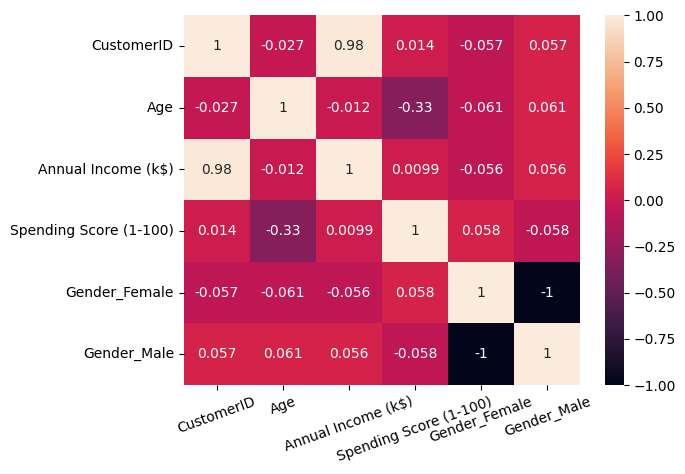

In [8]:
# Convert categorical data to numeric using get_dummies
dataset_encoded = pd.get_dummies(dataset)

# Now calculate the correlation matrix
corr_matrix = dataset_encoded.corr()
display(corr_matrix)

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True)
_ = plt.xticks(rotation=20)


C:\Users\HP\AppData\Local\Temp\ipykernel_20592\2779423713.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])  #displot sẽ bị hư hình mà là distplot mới đúng
C:\Users\HP\AppData\Local\Temp\ipykernel_20592\2779423713.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col]) 

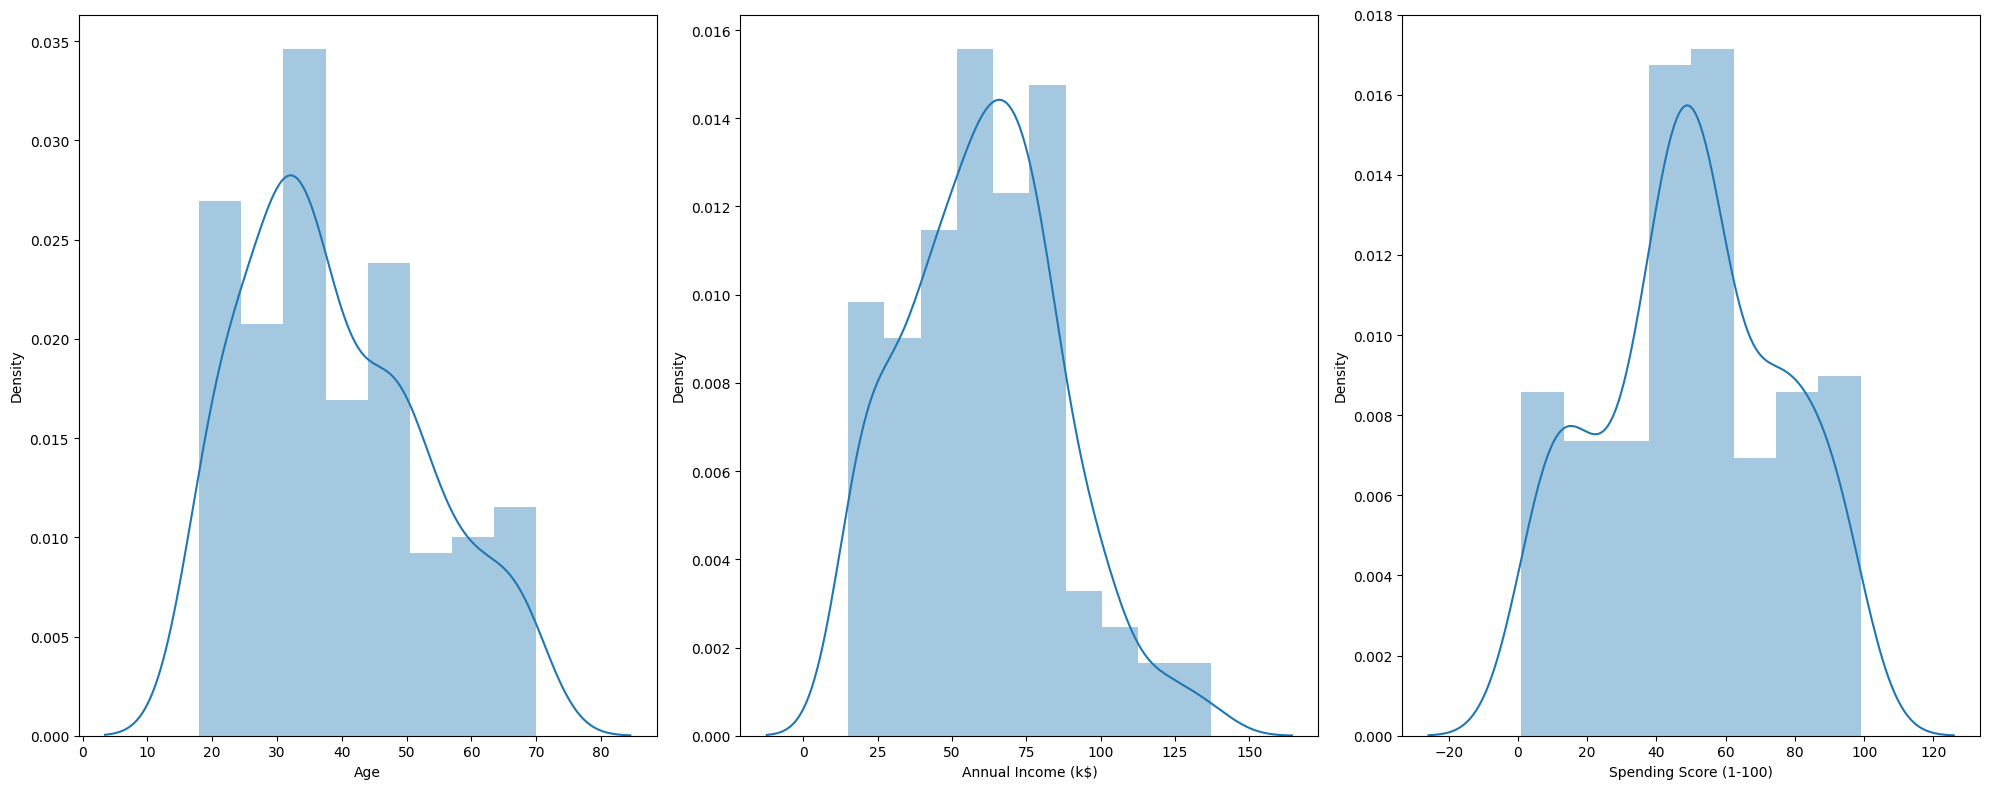

In [6]:
plt.figure(figsize = (20, 8))
plotnumber = 1
for col in dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]:
    if plotnumber <= 3: 
        ax = plt.subplot(1, 3, plotnumber) 
        sns.distplot(dataset[col])  #displot sẽ bị hư hình mà là distplot mới đúng
    plotnumber += 1 
plt.tight_layout() # Sắp xếp bố cục hình
plt.show()

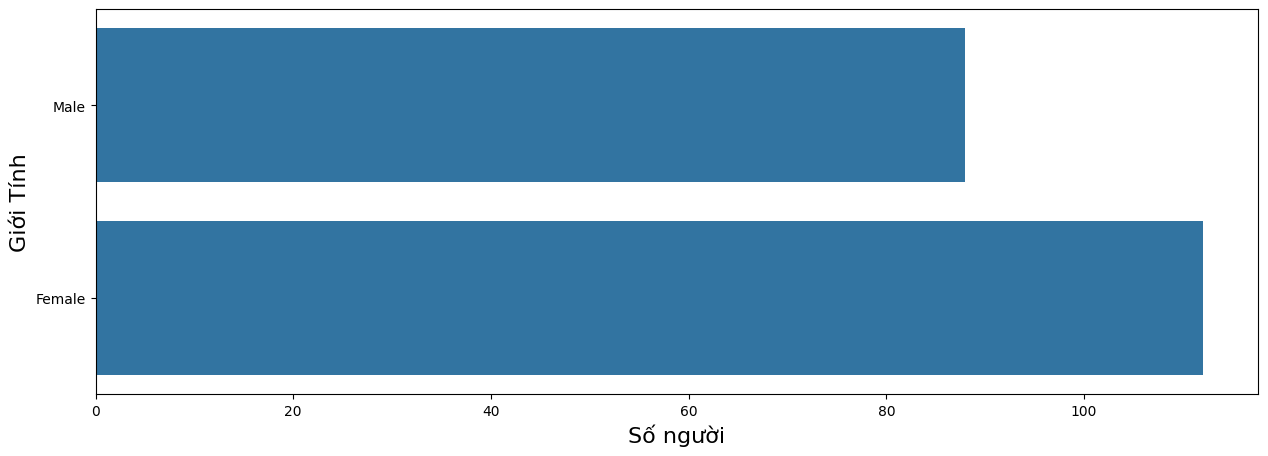

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender', data=dataset)
plt.xlabel('Số người',fontsize=16)
plt.ylabel('Giới Tính',fontsize=16)
plt.show()

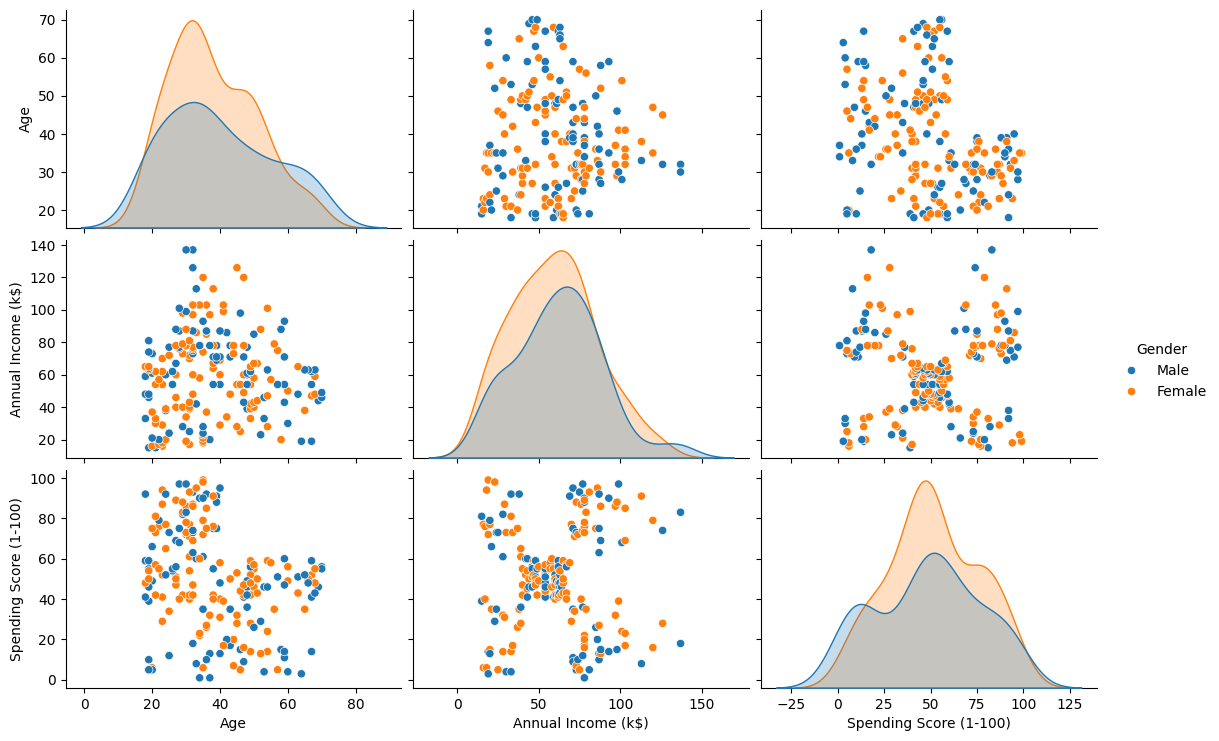

In [10]:
vs = dataset.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(dataset.drop(['CustomerID'], axis=1), hue='Gender', aspect=1.5)
plt.show()

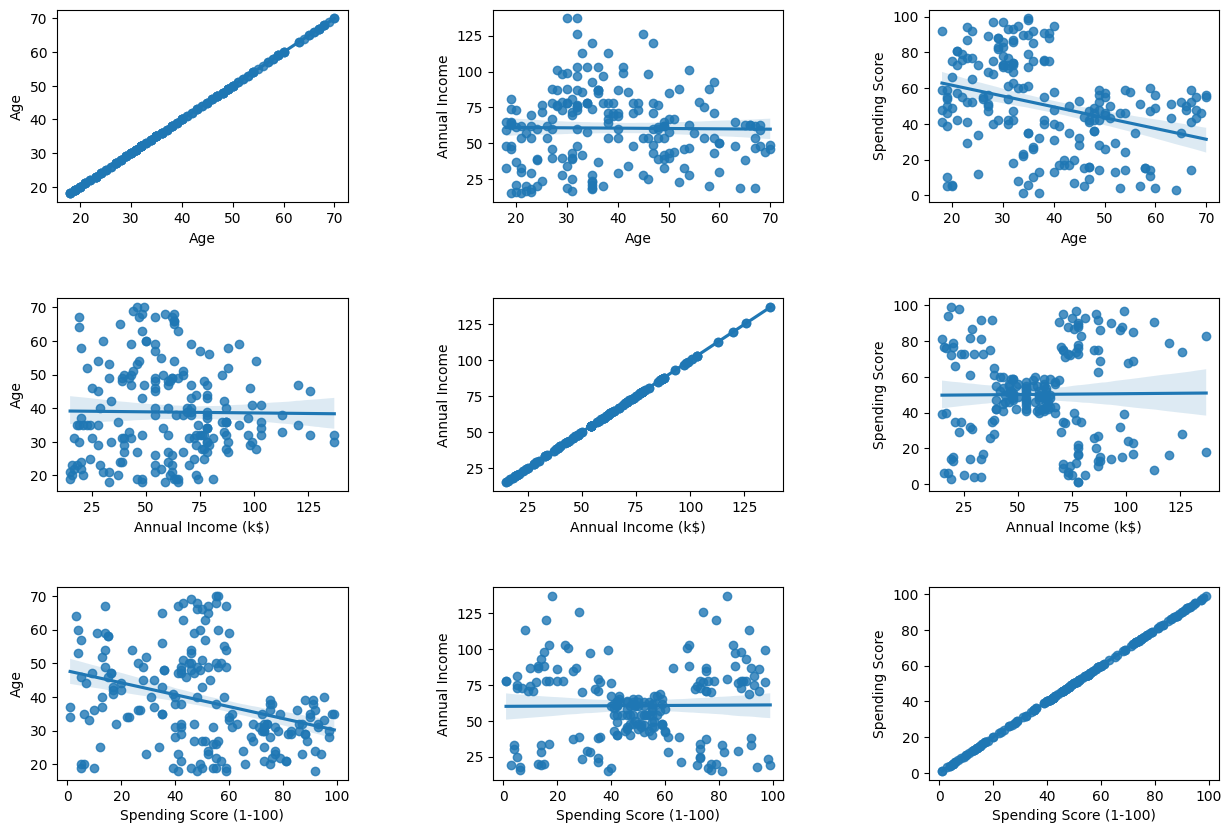

In [11]:
# Mối quan hệ giữa thuộc tính tuổi, thu nhập hằng năm, điểm chỉ tiêu
plt.figure(1 , figsize = (15 , 10))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = dataset)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [15]:
'''
from sklearn.preprocessing import LabelEncoder  # Số hóa dữ liệu thuộc tính Gender sử dụng lớp LabelEncoder chuyển đổi [0, n-1]
encoder = LabelEncoder()
dataset['Gender'] = encoder.fit_transform(dataset['Gender']) # Male(Nam) được mã hóa là 1 và ngược lại Female(Nữ) là 0
print(dataset.head())
'''

"\nfrom sklearn.preprocessing import LabelEncoder  # Số hóa dữ liệu thuộc tính Gender sử dụng lớp LabelEncoder chuyển đổi [0, n-1]\nencoder = LabelEncoder()\ndataset['Gender'] = encoder.fit_transform(dataset['Gender']) # Male(Nam) được mã hóa là 1 và ngược lại Female(Nữ) là 0\nprint(dataset.head())\n"

In [16]:
X = dataset.iloc[:,[3,4]].values # hay .to_numpy() đều được dùng để chuyển dataframe sang dạng numpy array cho bước khai phá dữ liệu
print(X[:10])
# Do Annual Income (k$) vs Spending Score (1-100) chứa độ lớn giá trị của mỗi feature là khác nhau nên ta tiến hành điều chỉnh tỉ lệ (Rescale Data) để thuật toán không bị ảnh hưởng
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_std = std.fit_transform(X)
print(X_std[:10])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]]


In [17]:
from sklearn.cluster import KMeans

In [18]:
kmean_3 = KMeans(n_clusters=3)
kmean_3.fit(X_std)
label_3 = kmean_3.labels_
print(label_3)
print(kmean_3.cluster_centers_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
[[ 1.00919971 -1.22553537]
 [ 0.99158305  1.23950275]
 [-0.62618966 -0.01439238]]


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
from sklearn import metrics
s = metrics.silhouette_score(X_std, label_3, metric='euclidean')
print("Đánh giá theo phương pháp Silhouette Score với k=3: ", s)
#rate2 = metrics.calinski_harabasz_score(X_std, label_3)
#print("Đánh giá loại 2: ", rate2)

Đánh giá theo phương pháp Silhouette Score với k=3:  0.46658474419000145


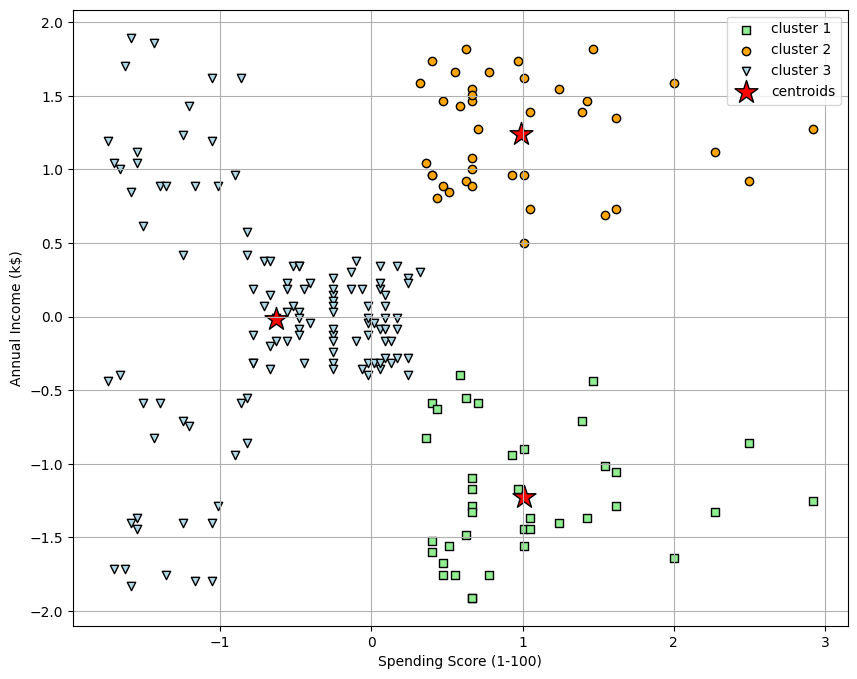

[Trục X      Trục Y]
 [[ 1.00919971 -1.22553537]
 [ 0.99158305  1.23950275]
 [-0.62618966 -0.01439238]]


In [20]:
plt.figure(figsize=(10,8))
plt.scatter(
    X_std[label_3 == 0, 0], X_std[label_3 == 0, 1],
    c = 'lightgreen', marker= 's', edgecolors='black',
    label='cluster 1'
)
plt.scatter(
    X_std[label_3 == 1, 0], X_std[label_3 == 1, 1],
    c = 'orange', marker= 'o', edgecolors='black',
    label='cluster 2'
)
plt.scatter(
    X_std[label_3 == 2, 0], X_std[label_3 == 2, 1],
    c = 'lightblue', marker= 'v', edgecolors='black',
    label='cluster 3'
)

plt.scatter(
    kmean_3.cluster_centers_[:,0], kmean_3.cluster_centers_[:,1],
    c = 'red', s=300, marker= '*', edgecolors='black',
    label='centroids'
)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.legend(scatterpoints=1) # Chú thích trong biểu đồ
plt.grid() # Bỏ qua khung caro
plt.show()
print("[Trục X      Trục Y]\n",kmean_3.cluster_centers_)

In [15]:
sum_distances = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0) # random_state cố định kết quả ra như nhau nếu ko sẽ cho ra kết quả trong mỗi lần chạy là khác nhau
    kmeans.fit(X_std)
    #inertia_ là khoảng cách giữa điểm chính giữa đến những dữ liệu xung quanh within-cluster sum-of-squares (tổng bình phương trong cụm)
    sum_distances.append(kmeans.inertia_) 

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\A

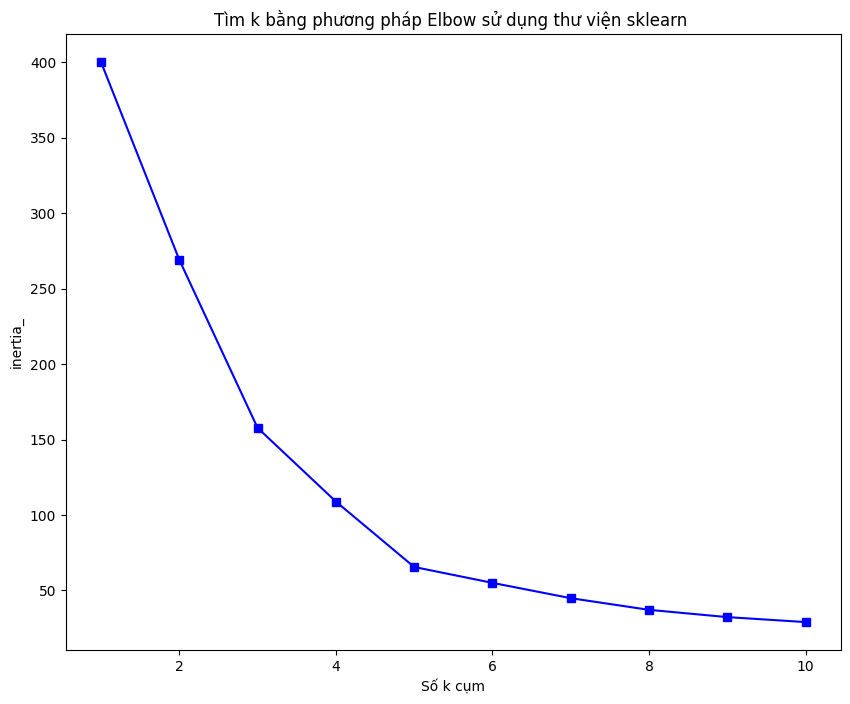

In [16]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(1,11), sum_distances, 'bs-')
plt.title('Tìm k bằng phương pháp Elbow sử dụng thư viện sklearn ')
plt.xlabel('Số k cụm')
plt.ylabel('inertia_')
plt.show()

In [21]:
kmean_5 = KMeans(n_clusters=5, init='k-means++', n_init=20, max_iter=200, random_state=0, algorithm='lloyd') #init xác định điểm trung tâm dựa trên phân phối xác suất có điều kiện cho các cụm mặc định là k-means++
model = kmean_5.fit(X_std)
results = kmean_5.predict(X_std) # Dùng kmean_5.label_ đều được
print(results)
print(model.cluster_centers_)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
[[ 1.05500302 -1.28443907]
 [-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [-1.30751869 -1.13696536]]


In [22]:
rate2 = metrics.silhouette_score(X_std, results, metric='euclidean')
print("Đánh giá theo phương pháp Silhouette Score với k=5: ", rate2)
#rate2 = metrics.calinski_harabasz_score(X, results)
#print("Đánh giá loại 2: ", rate2)

Đánh giá theo phương pháp Silhouette Score với k=5:  0.5546571631111091


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\A

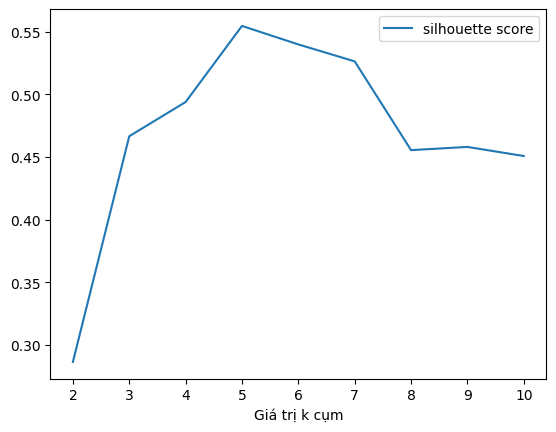

In [23]:
k_values = []
silhouette_score_values = []
for i in range(2, 11):
    kmeanss = KMeans(n_clusters=i)
    y_pred = kmeanss.fit_predict(X_std)
    k_values.append(i)
    silhouette_score_values.append(metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
res = pd.DataFrame({'Giá trị k cụm': k_values, 'silhouette score': silhouette_score_values})
res.plot.line(x='Giá trị k cụm', y='silhouette score')
plt.show()

#Theo như hình ảnh cung cấp thì sẽ xuất hiện một vài sample cách xa có thể làm nhiễu dữ liệu và giảm độ chính xác của ta rất nhiều

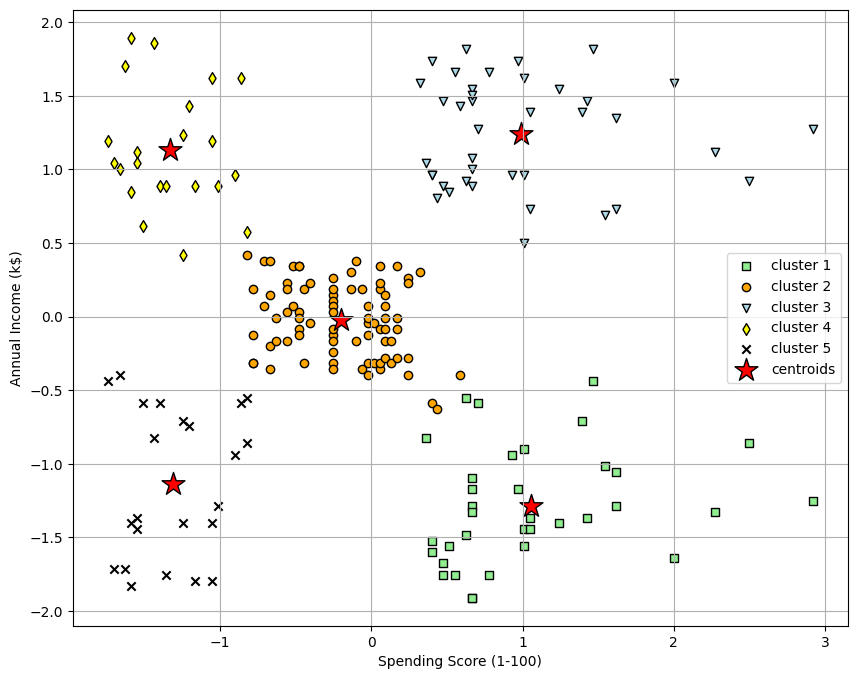

[Trục X      Trục Y]
 [[ 1.05500302 -1.28443907]
 [-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [-1.30751869 -1.13696536]]


In [24]:
plt.figure(figsize=(10,8))
plt.scatter(
    X_std[results == 0, 0], X_std[results == 0, 1],
    c = 'lightgreen', marker= 's', edgecolors='black',
    label='cluster 1'
)
plt.scatter(
    X_std[results == 1, 0], X_std[results == 1, 1],
    c = 'orange', marker= 'o', edgecolors='black',
    label='cluster 2'
)
plt.scatter(
    X_std[results == 2, 0], X_std[results == 2, 1],
    c = 'lightblue', marker= 'v', edgecolors='black',
    label='cluster 3'
)
plt.scatter(
    X_std[results == 3 , 0], X_std[results == 3, 1],
    c = 'yellow', marker= 'd', edgecolors='black',
    label='cluster 4'
)
plt.scatter(
    X_std[results == 4 , 0], X_std[results == 4, 1],
    c = 'black', marker= 'x',
    label='cluster 5'
)
plt.scatter(
    model.cluster_centers_[:,0], model.cluster_centers_[:,1],
    c = 'red', s=300, marker= '*', edgecolors='black',
    label='centroids'
)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.legend(scatterpoints=1) # Chú thích trong biểu đồ
plt.grid() # Bỏ qua khung caro
plt.show()
print("[Trục X      Trục Y]\n",kmean_5.cluster_centers_)

In [25]:
df = dataset[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [26]:
df['Cluster'] = results
data = df.to_csv('Results_Clustering_K-means.csv')

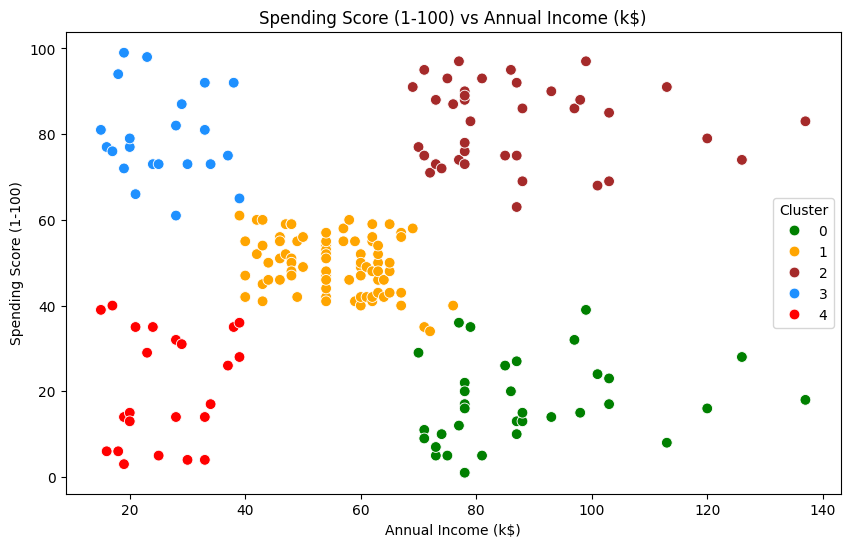

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue='Cluster',
                palette=['green', 'orange','brown','dodgerblue','red'], legend='full', data=df, s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [24]:
C1 = df[df['Cluster']==0]
print('Số lượng khách hàng trong cụm 0 là: ', len(C1))
print('Mã số khách hàng lần lượt= ', C1['CustomerID'].values)
print('---------------------------------------------')
C2 = df[df['Cluster']==1]
print('Số lượng khách hàng trong cụm 1 là: ', len(C2))
print('Mã số khách hàng lần lượt= ', C2['CustomerID'].values)
print('---------------------------------------------')
C3 = df[df['Cluster']==2]
print('Số lượng khách hàng trong cụm 2 là: ', len(C3))
print('Mã số khách hàng lần lượt= ', C3['CustomerID'].values)
print('---------------------------------------------')
C4 = df[df['Cluster']==3]
print('Số lượng khách hàng trong cụm 3 là: ', len(C4))
print('Mã số khách hàng lần lượt= ', C4['CustomerID'].values)
print('---------------------------------------------')
C5 = df[df['Cluster']==4]
print('Số lượng khách hàng trong cụm 4 là: ', len(C5))
print('Mã số khách hàng lần lượt= ', C5['CustomerID'].values)
print('---------------------------------------------')

Số lượng khách hàng trong cụm 0 là:  35
Mã số khách hàng lần lượt=  [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
---------------------------------------------
Số lượng khách hàng trong cụm 1 là:  81
Mã số khách hàng lần lượt=  [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]
---------------------------------------------
Số lượng khách hàng trong cụm 2 là:  39
Mã số khách hàng lần lượt=  [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
---------------------------------------------
Số lượng khách hàng trong

# Cụm 0 gồm những khách hàng có mức thu nhập cao và điểm chỉ tiêu thấp  (high - low)
# Cụm 1 gồm những khách hàng có mức thu nhập trung bình và điểm chỉ tiêu trung bình (normal - normal)
# Cụm 2 gồm những khách hàng có mức thu nhập cao và điểm chỉ tiêu cao   (high - high)
# Cụm 3 gồm những khách hàng có mức thu nhập thấp nhưng điểm chỉ tiêu cao   (low - high)
# Cụm 4 gồm những khách hàng có mức thu nhập thấp và điểm chỉ tiêu thấp (low - low)

In [25]:
def Predict_clusters(model, thunhap, diemso):
    arr = np.array([[thunhap, diemso]])
    pred = model.predict(arr)
    if (diemso <= 3 and diemso >= -1 & thunhap <= 2 and thunhap >=-2):
        return df[df['Cluster'] == pred[0]].sample(5)
    else:
        return print("Sai số liệu nhập!")

In [26]:
thunhap = 2
diemso = 3
Predict_clusters(model, thunhap, diemso)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
189,190,Female,36,103,85,2
197,198,Male,32,126,74,2
131,132,Male,39,71,75,2
159,160,Female,30,78,73,2
181,182,Female,32,97,86,2


In [27]:
!pip install yellowbrick

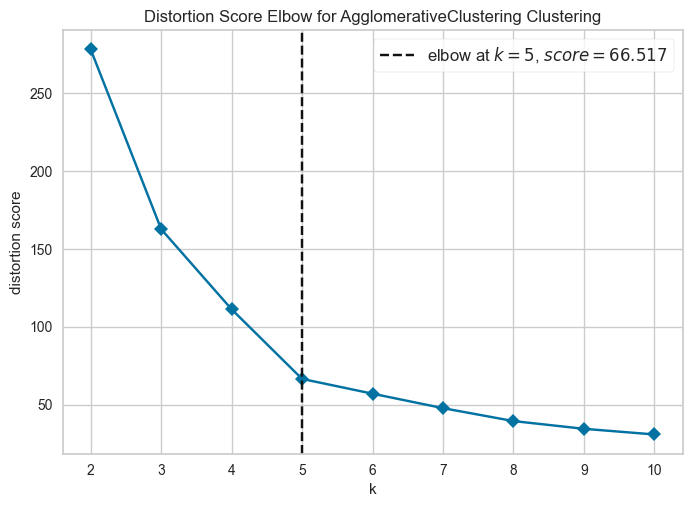

In [27]:
# Import ElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,11), timings=False)
# Fit data to visualizer
visualizer.fit(X_std)
# Finalize and render figure
_ = visualizer.show()

In [28]:
algorithms = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
k_5 = algorithms.fit(X_std)
model2 = k_5.labels_

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


C:\Users\HP\AppData\Local\Temp\ipykernel_20592\909052242.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


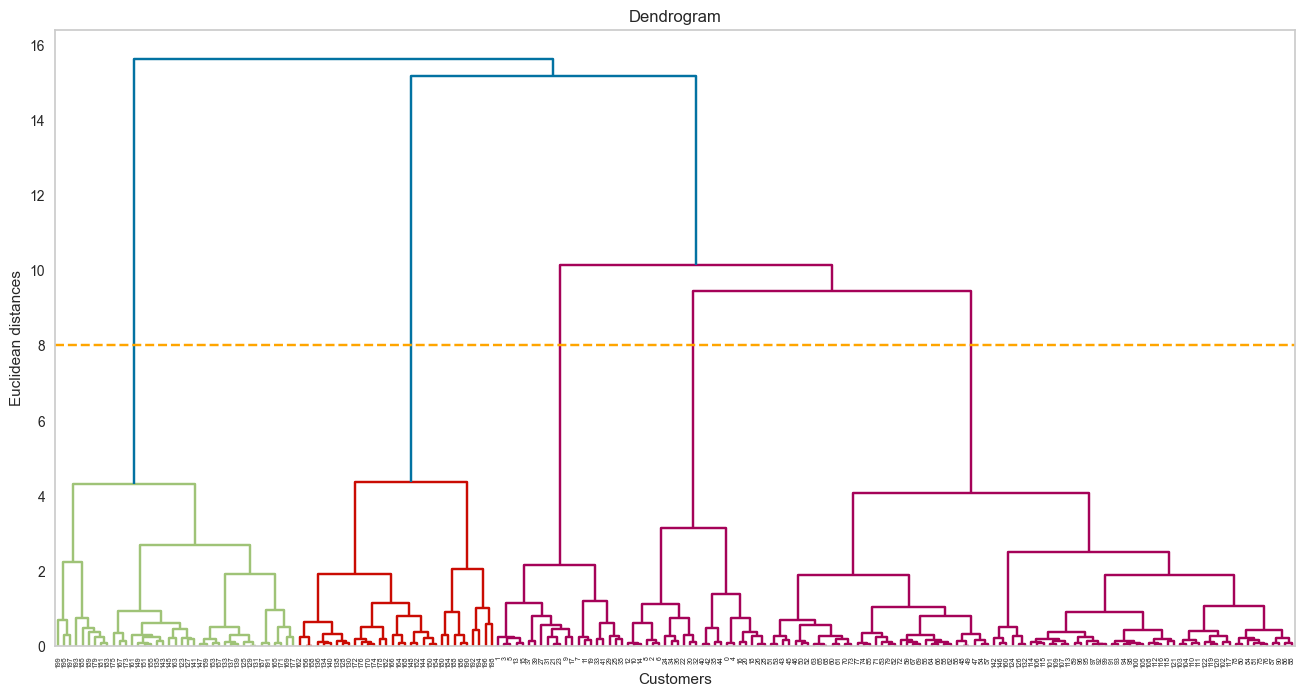

In [29]:
import scipy.cluster.hierarchy as sch
plt.figure(1, figsize = (16 ,8))  
plt.grid(b=None)
_ = dend = sch.dendrogram(sch.linkage(X_std, method='ward'))
# theroshold
plt.axhline(y=8, linestyle='--', color='orange')
# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [30]:
df2 = dataset[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df2['Clusters'] = model2
df2.to_csv('Results_Clustering_Aggolomerative.csv')

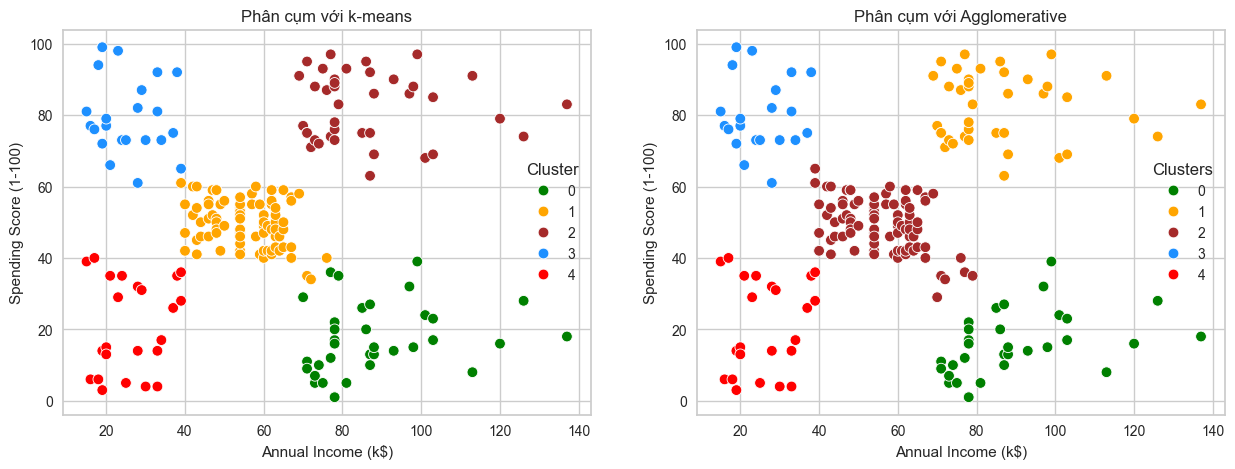

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue='Cluster',
                legend='full', s=60, palette=['green', 'orange','brown','dodgerblue','red']).set_title('Phân cụm với k-means')
sns.scatterplot(ax=axes[1], data=df2, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue='Clusters',
                legend='full', s=60, palette=['green', 'orange','brown','dodgerblue','red']).set_title('Phân cụm với Agglomerative')
plt.show()